In [1]:
from tqdm import tqdm_notebook

In [2]:
corpus=['Rishab likes pizza', 'I love gaming', 'Divyansh loves coding','NLP is fun','Chicken is tasty','I love running','Usain runs fast']

 # Featurize ,Tokenize and labelize

In [3]:
vocabulary={} # for storing word to index mapping
inputs=[] # for storing the input as indexes

for sentences in tqdm_notebook(corpus):
    sentence_indexes=[]
    
    sentences=sentences.split()
    
    for word in sentences :
        if word not in vocabulary:
            vocabulary[word] = len(vocabulary)
        
        sentence_indexes.append(vocabulary[word])
        
    inputs.append(sentence_indexes)

d:\python\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


Vocab to index mapping

In [4]:
print(vocabulary)

{'Rishab': 0, 'likes': 1, 'pizza': 2, 'I': 3, 'love': 4, 'gaming': 5, 'Divyansh': 6, 'loves': 7, 'coding': 8, 'NLP': 9, 'is': 10, 'fun': 11, 'Chicken': 12, 'tasty': 13, 'running': 14, 'Usain': 15, 'runs': 16, 'fast': 17}


In [5]:
len(vocabulary)

18

tokenized and index inputs

In [6]:
print(inputs)

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 10, 13], [3, 4, 14], [15, 16, 17]]


In [7]:
len(inputs)

7

Convert to feature sequences and labels

In [8]:
prefixes = [sentences[:-1] for sentences in inputs]

In [9]:
prefixes

[[0, 1], [3, 4], [6, 7], [9, 10], [12, 10], [3, 4], [15, 16]]

In [10]:
labels=[sentences[-1] for sentences in inputs]

In [11]:
labels

[2, 5, 8, 11, 13, 14, 17]

Convert to long tensors

In [12]:
import torch 
import torch.nn as nn
import torch.nn.functional as f

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [14]:
prefixes=torch.LongTensor(prefixes)
labels=torch.LongTensor(labels)

In [15]:
prefixes

tensor([[ 0,  1],
        [ 3,  4],
        [ 6,  7],
        [ 9, 10],
        [12, 10],
        [ 3,  4],
        [15, 16]])

In [16]:
labels

tensor([ 2,  5,  8, 11, 13, 14, 17])

# Create the neural language model

<h2>step by step building of nlm model </h2>

In [17]:
class simple_language_model(nn.Module):
    
    def __init__(self, embedding_dimension,hidden_dimension,
                 window_size,vocab_size):
        
        super(simple_language_model,self).__init__()
        
        self.embedding_layer=nn.Embedding(vocab_size,embedding_dimension)
        
        self.hidden_layer1=nn.Linear(embedding_dimension * window_size, hidden_dimension)
        
        self.hidden_layer2=nn.Linear(hidden_dimension,int(hidden_dimension/2))
        
        self.output_layer=nn.Linear(int(hidden_dimension/2),vocab_size)
        
    
    def forward(self,inp):
        
        batch_size,window_size=inp.size()
        
        embeddings=self.embedding_layer(inp)
        
        print(embeddings.size())
        
        

In [18]:
nlm_model_test=simple_language_model(embedding_dimension=5,hidden_dimension=14,
                               window_size=2,vocab_size=len(vocabulary))

for each of the n sentences, of prefix size k and embedding dimension e

shape is (n,k,e)

In [19]:
nlm_model_test(prefixes)

torch.Size([7, 2, 5])


In [20]:
class simple_language_model(nn.Module):
    
    def __init__(self, embedding_dimension,hidden_dimension,
                 window_size,vocab_size):
        
        super(simple_language_model,self).__init__()
        self.embedding_dimension=embedding_dimension
        self.hidden_dimension=hidden_dimension
        
        self.embedding_layer=nn.Embedding(vocab_size,embedding_dimension)
        
        self.hidden_layer1=nn.Linear(embedding_dimension * window_size, hidden_dimension)
        
        self.hidden_layer2=nn.Linear(hidden_dimension,int(hidden_dimension/2))
        
        self.output_layer=nn.Linear(int(hidden_dimension/2),vocab_size)
        
    
    def forward(self,inp):
        
        batch_size,window_size=inp.size()
        
        embeddings=self.embedding_layer(inp)
        
        #concatenate the prefix embeddings
        # n x k x e => n *(k*e)
        #7 x 2 x 5  => 7 * 10
        
        flattened_embeddings= embeddings.view(batch_size,window_size * self.embedding_dimension)
        
        print(f'flattened_embeddins size : {flattened_embeddings.size()}')
        print('-'*50)
        print(embeddings[0].shape)
        print(embeddings[0])
        print('-'*50)
        print(flattened_embeddings[0].shape)
        print(flattened_embeddings[0])

In [21]:
nlm_test_2=simple_language_model(embedding_dimension=5,hidden_dimension=14,
                               window_size=2,vocab_size=len(vocabulary))

In [22]:
nlm_test_2(prefixes)

flattened_embeddins size : torch.Size([7, 10])
--------------------------------------------------
torch.Size([2, 5])
tensor([[ 0.0125, -0.4433,  0.3469,  0.6609,  1.0673],
        [-0.4327,  0.8906, -0.0493, -0.1182,  1.0996]],
       grad_fn=<SelectBackward>)
--------------------------------------------------
torch.Size([10])
tensor([ 0.0125, -0.4433,  0.3469,  0.6609,  1.0673, -0.4327,  0.8906, -0.0493,
        -0.1182,  1.0996], grad_fn=<SelectBackward>)


In [23]:
class simple_language_model(nn.Module):
    
    def __init__(self, embedding_dimension,hidden_dimension,
                 window_size,vocab_size):
        
        super(simple_language_model,self).__init__()
        self.embedding_dimension=embedding_dimension
        self.hidden_dimension=hidden_dimension
        
        self.embedding_layer=nn.Embedding(vocab_size,embedding_dimension)
        
        self.hidden_layer1=nn.Linear(embedding_dimension * window_size, hidden_dimension)
        
        self.hidden_layer2=nn.Linear(hidden_dimension,int(hidden_dimension/2))
        
        self.output_layer=nn.Linear(int(hidden_dimension/2),vocab_size)
        
    
    def forward(self,inp):
        
        batch_size,window_size=inp.size()
        
        embeddings=self.embedding_layer(inp)
        
        #concatenate the prefix embeddings
        # n x k x e => n *(k*e)
        #7 x 2 x 5  => 7 * 10
        
        flattened_embeddings= embeddings.view(batch_size,window_size * self.embedding_dimension)
        
        linear_op1=self.hidden_layer1(flattened_embeddings)
        print(f'linear layer 1 op size : {linear_op1.size()}')
        
        linear_op2=self.hidden_layer2(linear_op1)
        print(f'linear layer 2 op size : {linear_op2.size()}')
        
        output=self.output_layer(linear_op2)
        print(f'output layer size : {output.size()}')
        print('-'*50)
        print(output)
        

In [24]:
nlm_test_3=simple_language_model(embedding_dimension=5,hidden_dimension=14,
                               window_size=2,vocab_size=len(vocabulary))

In [25]:
nlm_test_3(prefixes)

linear layer 1 op size : torch.Size([7, 14])
linear layer 2 op size : torch.Size([7, 7])
output layer size : torch.Size([7, 18])
--------------------------------------------------
tensor([[-1.6439e-01,  9.9236e-02,  2.9029e-01,  4.6701e-01, -3.1879e-01,
         -2.6406e-01, -1.1384e-01, -4.8852e-01,  2.3376e-01,  2.6768e-01,
         -1.4251e-01, -9.6536e-02, -4.2786e-01, -4.8078e-02,  1.7719e-01,
         -3.7736e-01, -1.7406e-01,  2.1032e-01],
        [-5.2857e-01,  1.6246e-01,  1.2657e-01,  5.1169e-01, -2.3235e-01,
         -2.8238e-01, -1.9139e-01, -4.1641e-01,  1.8845e-01,  7.9509e-02,
         -4.5540e-01, -2.7618e-01, -1.3463e-01, -5.9808e-04,  5.3274e-01,
         -6.6439e-01, -2.5536e-01,  2.3669e-01],
        [-1.3223e-02, -2.8271e-02,  4.6956e-01,  3.8507e-01, -2.7303e-01,
         -3.9297e-01, -1.6618e-01, -4.5953e-01,  2.9752e-01,  1.5953e-01,
         -2.2679e-01, -1.8754e-01, -4.3761e-01, -1.7526e-01,  1.7318e-01,
         -3.4019e-01, -1.5135e-01,  1.7221e-01],
       

In [26]:
class simple_language_model(nn.Module):
    
    def __init__(self, embedding_dimension,hidden_dimension,
                 window_size,vocab_size):
        
        super(simple_language_model,self).__init__()
        self.embedding_dimension=embedding_dimension
        self.hidden_dimension=hidden_dimension
        
        self.embedding_layer=nn.Embedding(vocab_size,embedding_dimension)
        
        self.hidden_layer1=nn.Linear(embedding_dimension * window_size, hidden_dimension)
        
        self.hidden_layer2=nn.Linear(hidden_dimension,int(hidden_dimension/2))
        
        self.output_layer=nn.Linear(int(hidden_dimension/2),vocab_size)
        
    
    def forward(self,inp):
        
        batch_size,window_size=inp.size()
        
        embeddings=self.embedding_layer(inp)
        
        #concatenate the prefix embeddings
        # n x k x e => n *(k*e)
        #7 x 2 x 5  => 7 * 10
        
        flattened_embeddings= embeddings.view(batch_size,window_size * self.embedding_dimension)
        
        linear_op1=self.hidden_layer1(flattened_embeddings)
        
        linear_op2=self.hidden_layer2(linear_op1)
        
        output=self.output_layer(linear_op2)
        
        probabilities=f.softmax(output,dim=1)
        print(probabilities)
        print('-'*50)
        print(f'sum of softmax ops (should be 1) : {probabilities.sum(dim=1)}')
        

In [27]:
nlm_test_4=simple_language_model(embedding_dimension=5,hidden_dimension=14,
                               window_size=2,vocab_size=len(vocabulary))

In [28]:
nlm_test_4(prefixes)

tensor([[0.0617, 0.0536, 0.0667, 0.0513, 0.0442, 0.0901, 0.0585, 0.0395, 0.0525,
         0.0487, 0.0412, 0.0484, 0.0481, 0.0661, 0.0710, 0.0532, 0.0625, 0.0427],
        [0.0671, 0.0643, 0.0672, 0.0453, 0.0510, 0.0963, 0.0670, 0.0483, 0.0524,
         0.0399, 0.0462, 0.0531, 0.0526, 0.0441, 0.0487, 0.0631, 0.0551, 0.0386],
        [0.0664, 0.0531, 0.0852, 0.0437, 0.0430, 0.0613, 0.0585, 0.0517, 0.0427,
         0.0385, 0.0751, 0.0405, 0.0694, 0.0483, 0.0330, 0.0566, 0.0833, 0.0498],
        [0.0698, 0.0621, 0.0784, 0.0424, 0.0478, 0.0770, 0.0652, 0.0541, 0.0476,
         0.0355, 0.0653, 0.0464, 0.0658, 0.0383, 0.0335, 0.0631, 0.0648, 0.0430],
        [0.0721, 0.0648, 0.0808, 0.0341, 0.0549, 0.0819, 0.0681, 0.0580, 0.0440,
         0.0300, 0.0693, 0.0526, 0.0644, 0.0320, 0.0234, 0.0702, 0.0590, 0.0402],
        [0.0671, 0.0643, 0.0672, 0.0453, 0.0510, 0.0963, 0.0670, 0.0483, 0.0524,
         0.0399, 0.0462, 0.0531, 0.0526, 0.0441, 0.0487, 0.0631, 0.0551, 0.0386],
        [0.0659, 0.046

# final model and loss functions,optimizer

In [29]:
class simple_language_model(nn.Module):
    
    def __init__(self, embedding_dimension,hidden_dimension,
                 window_size,vocab_size):
        
        super(simple_language_model,self).__init__()
        self.embedding_dimension=embedding_dimension
        self.hidden_dimension=hidden_dimension
        
        self.embedding_layer=nn.Embedding(vocab_size,embedding_dimension)
        
        self.hidden_layer1=nn.Linear(embedding_dimension * window_size, hidden_dimension)
        
        self.hidden_layer2=nn.Linear(hidden_dimension,int(hidden_dimension/2))
        
        self.output_layer=nn.Linear(int(hidden_dimension/2),vocab_size)
        
    
    def forward(self,inp):
        
        batch_size,window_size=inp.size()
        
        embeddings=self.embedding_layer(inp)
        
        #concatenate the prefix embeddings
        # n x k x e => n *(k*e)
        #7 x 2 x 5  => 7 * 10
        
        flattened_embeddings= embeddings.view(batch_size,window_size * self.embedding_dimension)
        
        linear_op1=self.hidden_layer1(flattened_embeddings)
        
        linear_op2=self.hidden_layer2(linear_op1)
        
        output=self.output_layer(linear_op2)
        
        return output #logits

In [30]:
nlm_model=simple_language_model(embedding_dimension=5,hidden_dimension=14,
                               window_size=2,vocab_size=len(vocabulary))

In [31]:
num_epochs=90
learning_rate= 0.1


loss_criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=nlm_model.parameters(),
                         lr=learning_rate)

# training loop

In [32]:
losses=[]

for epoch in range(num_epochs):
    
    outputs=nlm_model(prefixes)
    
    loss=loss_criterion(outputs,labels)
    
    #compute gradient
    loss.backward()
    
    #backpropagate and flush out the gradients for next epoch
    optimizer.step()
    optimizer.zero_grad()
    
    print(f'Epoch {epoch}/{num_epochs}, Loss {loss.item()}')
    losses.append(loss.item())

Epoch 0/90, Loss 2.9957337379455566
Epoch 1/90, Loss 2.9441401958465576
Epoch 2/90, Loss 2.8939268589019775
Epoch 3/90, Loss 2.8444085121154785
Epoch 4/90, Loss 2.794975757598877
Epoch 5/90, Loss 2.7450692653656006
Epoch 6/90, Loss 2.694162607192993
Epoch 7/90, Loss 2.6417553424835205
Epoch 8/90, Loss 2.5873589515686035
Epoch 9/90, Loss 2.530500888824463
Epoch 10/90, Loss 2.47072434425354
Epoch 11/90, Loss 2.407597780227661
Epoch 12/90, Loss 2.340738534927368
Epoch 13/90, Loss 2.269840717315674
Epoch 14/90, Loss 2.19472336769104
Epoch 15/90, Loss 2.115389347076416
Epoch 16/90, Loss 2.0320916175842285
Epoch 17/90, Loss 1.9453915357589722
Epoch 18/90, Loss 1.8561879396438599
Epoch 19/90, Loss 1.7656736373901367
Epoch 20/90, Loss 1.6752084493637085
Epoch 21/90, Loss 1.5861200094223022
Epoch 22/90, Loss 1.4994993209838867
Epoch 23/90, Loss 1.4160875082015991
Epoch 24/90, Loss 1.3362902402877808
Epoch 25/90, Loss 1.2602933645248413
Epoch 26/90, Loss 1.1881943941116333
Epoch 27/90, Loss 1.12

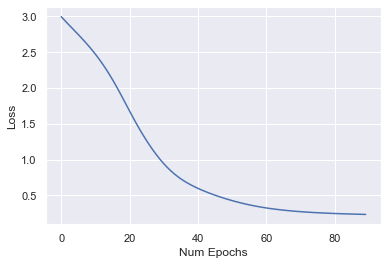

In [33]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Num Epochs')
plt.show()

# test time

In [34]:
#idx to word
reverse_vocabulary = dict((idx, word )  for (word,idx) in vocabulary.items()) 

In [35]:
print(reverse_vocabulary)

{0: 'Rishab', 1: 'likes', 2: 'pizza', 3: 'I', 4: 'love', 5: 'gaming', 6: 'Divyansh', 7: 'loves', 8: 'coding', 9: 'NLP', 10: 'is', 11: 'fun', 12: 'Chicken', 13: 'tasty', 14: 'running', 15: 'Usain', 16: 'runs', 17: 'fast'}


In [36]:
rish_likes= prefixes[0].unsqueeze(0) #to add a dummy dim for nn model
#print(test_item.shape)

test_op=nlm_model(rish_likes)

probab=f.softmax(test_op,dim=1).squeeze()

pred_word=torch.argmax(probab).item()

print(f'Input is "Rishab likes" , the model predicts "{reverse_vocabulary[pred_word]}" with {probab[pred_word]} probability')



Input is "Rishab likes" , the model predicts "pizza" with 0.9796783924102783 probability


In [37]:
usain= prefixes[6].unsqueeze(0) #to add a dummy dim for nn model
#print(test_item.shape)

test_op=nlm_model(usain)

probab=f.softmax(test_op,dim=1).squeeze()

pred_word=torch.argmax(probab).item()

print(f'Input is "Usain runs" , the model predicts "{reverse_vocabulary[pred_word]}" with {probab[pred_word]} probability')



Input is "Usain runs" , the model predicts "fast" with 0.986263632774353 probability


In [39]:
div= prefixes[2].unsqueeze(0) #to add a dummy dim for nn model
#print(test_item.shape)

test_op=nlm_model(div)

probab=f.softmax(test_op,dim=1).squeeze()

pred_word=torch.argmax(probab).item()

print(f'Input is "Divyansh likes" , the model predicts "{reverse_vocabulary[pred_word]}" with {probab[pred_word]} probability')



Input is "Divyansh likes" , the model predicts "coding" with 0.9468822479248047 probability
